In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset_url: str = 'https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv'

### Preprocessing

In [8]:
cars = pd.read_csv('Data/car data.csv')

In [9]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [37]:
cars.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [38]:
cars.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [40]:
cars.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [41]:
cars.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [39]:
cars.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [35]:
cars.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [34]:
cars.Car_Name.value_counts().sort_values(ascending=False)[:3]

city             26
corolla altis    16
verna            14
Name: Car_Name, dtype: int64

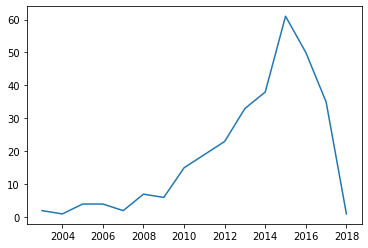

In [27]:
cars.Year.value_counts().sort_index().plot();

In [28]:
cars.loc[cars.Year == 2018, :]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


In [42]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

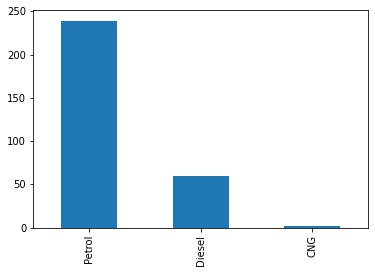

In [69]:
cars.Fuel_Type.value_counts().plot(kind='bar')

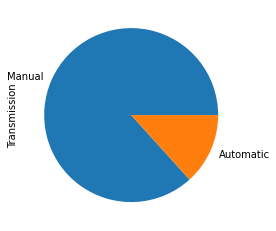

In [73]:
cars.Transmission.value_counts().plot(kind='pie');

In [100]:
correlation = cars.corr()

<AxesSubplot:>

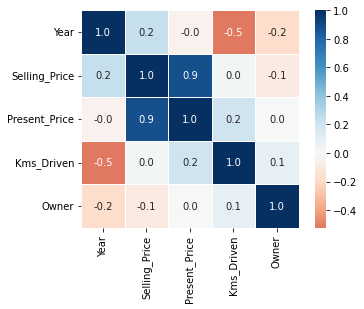

In [110]:
sns.heatmap(correlation, center=0, square=True, annot=True, fmt='0.1f', cmap='RdBu', linewidths=1)

In [ ]:
# color palettes in seaborn are two types: sequential; divergence.

In [84]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [85]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [93]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Fuel_Type', 'Seller_Type', 'Transmission']),
    remainder='passthrough',
)

In [98]:
from sklearn.model_selection import train_test_split

X = cars.drop(['Selling_Price', 'Car_Name'], axis='columns')
y = cars.Selling_Price

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1541)

In [112]:
len(X_train), len(X_test)

(270, 31)

In [119]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

linreg_pipe = make_pipeline(column_trans, LinearRegression())
lasso_pipe = make_pipeline(column_trans, Lasso())
ridge_pipe = make_pipeline(column_trans, Ridge())

In [121]:
cross_val_score(linreg_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean()

-4.524853678241525

In [122]:
cross_val_score(lasso_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean()

-5.314713302748303

In [123]:
cross_val_score(ridge_pipe, X, y, cv=10, scoring='neg_mean_squared_error').mean()

-4.519723515146959